In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from bs4 import BeautifulSoup
from urllib import request



website = request.urlopen("https://www.pro-football-reference.com/years/2021/fantasy.htm").read()
soup = BeautifulSoup(website, 'lxml')

table = soup.find('table', attrs={'id': 'fantasy','class': 'per_match_toggle'})

table_headers = [header.text for header in table.find('thead').find_all('th')]
table_rows = table.find_all('tr')

player_data = [[td.getText() for tr in table_rows[i].findAll(['td','th'])] for i in table_rows]

print(table_headers)
df = pd.DataFrame(player_data,table_headers)

df.head()

df = pd.DataFrame(df, columns = table_headers)

In [225]:
# fantasy football datasets; results from each season

ff21 = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/master/yearly/2021.csv', index_col = 0)

ff20 = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/master/yearly/2020.csv')

ff19 = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/master/yearly/2019.csv', index_col = 0)


# team stats and rankings from each game per season

team19 = pd.read_csv("C:/Users/steph/OneDrive/Documents/Data Projects/2019_NFL_COMBINE.csv", index_col = 0)
team20 = pd.read_csv("C:/Users/steph/OneDrive/Documents/Data Projects/2020_NFL_COMBINE.csv", index_col = 0)
team21 = pd.read_csv("C:/Users/steph/OneDrive/Documents/Data Projects/2021_NFL_COMBINE.csv", index_col = 0)
team22 = pd.read_csv("C:/Users/steph/OneDrive/Documents/Data Projects/2022_NFL_COMBINE.csv", index_col = 0)

# Incoming rookie data



# PFF Data (OL rankings, etc)


# Injury Data?
# contract data? years in the league? 


In [226]:
ff21.head()

,Player,Tm,Pos,Age,G,GS,Tgt,Rec,PassingYds,PassingTD,PassingAtt,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,FantasyPoints,Int,Fumbles,FumblesLost
0,Jonathan Taylor*+,IND,RB,22,17,17,51.0,40.0,0.0,0.0,0.0,1811.0,18.0,332.0,360.0,2.0,333.0,0.0,4.0,2.0
1,Cooper Kupp*+,LAR,WR,28,17,17,191.0,145.0,0.0,0.0,1.0,18.0,0.0,4.0,1947.0,16.0,295.0,0.0,0.0,0.0
2,Deebo Samuel*+,SFO,WR,25,16,15,121.0,77.0,24.0,1.0,2.0,365.0,8.0,59.0,1405.0,6.0,262.0,0.0,4.0,2.0
3,Josh Allen,BUF,QB,25,17,17,0.0,0.0,4407.0,36.0,646.0,763.0,6.0,122.0,0.0,0.0,403.0,15.0,8.0,3.0
4,Austin Ekeler,LAC,RB,26,16,16,94.0,70.0,0.0,0.0,0.0,911.0,12.0,206.0,647.0,8.0,274.0,0.0,4.0,3.0


In [227]:
ff19.head()

,Player,Tm,Pos,Age,G,GS,Tgt,Rec,PassingYds,PassingTD,PassingAtt,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,FantasyPoints,Int,Fumbles,FumblesLost
Unnamed: 0,,,,,,,,,,,,,,,,,,,,
0,Christian McCaffrey,CAR,RB,23.0,16.0,16.0,142.0,116.0,0.0,0.0,2.0,1387.0,15.0,287.0,1005.0,4.0,469.20,0.0,1.0,0.0
1,Lamar Jackson,BAL,QB,22.0,15.0,15.0,0.0,0.0,3127.0,36.0,401.0,1206.0,7.0,176.0,0.0,0.0,415.68,6.0,9.0,2.0
2,Derrick Henry,TEN,RB,25.0,15.0,15.0,24.0,18.0,0.0,0.0,0.0,1540.0,16.0,303.0,206.0,2.0,294.60,0.0,5.0,3.0
3,Aaron Jones,GNB,RB,25.0,16.0,16.0,68.0,49.0,0.0,0.0,0.0,1084.0,16.0,236.0,474.0,3.0,314.80,0.0,3.0,2.0
4,Ezekiel Elliott,DAL,RB,24.0,16.0,16.0,71.0,54.0,0.0,0.0,0.0,1357.0,12.0,301.0,420.0,2.0,311.70,0.0,3.0,2.0


In [228]:
team19.head()

,Week,Day,Date,Unnamed: 5,Opp,Tm,Opp.1,1stD,TotYd,PassY,...,TO,1stD.1,TotYd.1,PassY.1,RushY.1,TO.1,Offense,Defense,Sp. Tms,Home_team
0,1,Sun,8-Sep,W,Tampa Bay Buccaneers,31.0,17.0,17.0,256.0,158.0,...,2.0,21.0,295.0,174.0,121.0,4.0,-7.51,19.12,1.10,San Francisco 49ers
1,2,Sun,15-Sep,W,Cincinnati Bengals,41.0,17.0,27.0,571.0,312.0,...,1.0,14.0,316.0,291.0,25.0,1.0,27.34,1.14,-6.64,San Francisco 49ers
2,3,Sun,22-Sep,W,Pittsburgh Steelers,24.0,20.0,26.0,436.0,268.0,...,5.0,11.0,239.0,160.0,79.0,2.0,-3.72,10.20,0.12,San Francisco 49ers
3,4,NaN,NaN,NaN,Bye Week,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,San Francisco 49ers
4,5,Mon,7-Oct,W,Cleveland Browns,31.0,3.0,22.0,446.0,171.0,...,NaN,9.0,180.0,78.0,102.0,4.0,12.38,22.56,-10.50,San Francisco 49ers


Need to clean player name from *, + and/or both.

Need to group by position, as points scored and value is dependent on position.

need a dataset of predictor variables for final -- previous year's players (2021) plus rookies (2022) draft.

Need to bring in a dataset of rookies 

Need a dataset of team ranks from previous year (2021)

We'll use 19 and 20 as training years; 21 as test year. 

Final model will use previous 2 season data, and other, to predict upcoming season data


In [229]:
ff21.dtypes

ff20.dtypes

Player            object
Tm                object
Pos               object
Age                int64
G                  int64
GS                 int64
Tgt                int64
Rec                int64
PassingYds         int64
PassingTD          int64
PassingAtt         int64
RushingYds         int64
RushingTD          int64
RushingAtt         int64
ReceivingYds       int64
ReceivingTD        int64
FantasyPoints    float64
Int                int64
Fumbles            int64
FumblesLost        int64
dtype: object

In [230]:
# cleaning player names

ff21['Player'] = ff21['Player'].str.replace("+","", regex = True)
ff21['Player'] = ff21['Player'].str.replace("*","", regex = True)

ff20['Player'] = ff20['Player'].str.replace("+","", regex = True)
ff20['Player'] = ff20['Player'].str.replace("*","", regex = True)

ff19['Player'] = ff19['Player'].str.replace("+","", regex = True)
ff19['Player'] = ff19['Player'].str.replace("*","", regex = True)



Now, let's merge these dataframes on Player name

In [231]:
# concatenating data frames

ff_all = pd.merge(ff19, ff20, how = 'outer', left_on = ff19['Player'], right_on = ff20['Player'], suffixes = ('_19', '_20')).reset_index(drop = True)

ff_all.head()

,key_0,Player_19,Tm_19,Pos_19,Age_19,G_19,GS_19,Tgt_19,Rec_19,PassingYds_19,...,PassingAtt_20,RushingYds_20,RushingTD_20,RushingAtt_20,ReceivingYds_20,ReceivingTD_20,FantasyPoints_20,Int_20,Fumbles_20,FumblesLost_20
0,Christian McCaffrey,Christian McCaffrey,CAR,RB,23.0,16.0,16.0,142.0,116.0,0.0,...,0.0,225.0,5.0,59.0,149.0,1.0,73.0,0.0,0.0,0.0
1,Lamar Jackson,Lamar Jackson,BAL,QB,22.0,15.0,15.0,0.0,0.0,3127.0,...,376.0,1005.0,7.0,159.0,0.0,0.0,333.0,9.0,10.0,4.0
2,Derrick Henry,Derrick Henry,TEN,RB,25.0,15.0,15.0,24.0,18.0,0.0,...,0.0,2027.0,17.0,378.0,114.0,0.0,314.0,0.0,3.0,2.0
3,Aaron Jones,Aaron Jones,GNB,RB,25.0,16.0,16.0,68.0,49.0,0.0,...,0.0,1104.0,9.0,201.0,355.0,2.0,212.0,0.0,2.0,0.0
4,Ezekiel Elliott,Ezekiel Elliott,DAL,RB,24.0,16.0,16.0,71.0,54.0,0.0,...,0.0,979.0,6.0,244.0,338.0,2.0,172.0,0.0,6.0,5.0


In [232]:
# first, adding suffix to 21
ff21 = ff21.add_suffix('_21')



In [258]:
ff21['Tm_21'].isnull().sum()

0

In [234]:
# concatenating data frames (19+20 with 21)

ff21['key_0'] = ff21['Player_21']


ff_all = ff_all.merge(ff21, on = 'key_0')

ff_all

,key_0,Player_19,Tm_19,Pos_19,Age_19,G_19,GS_19,Tgt_19,Rec_19,PassingYds_19,...,PassingAtt_21,RushingYds_21,RushingTD_21,RushingAtt_21,ReceivingYds_21,ReceivingTD_21,FantasyPoints_21,Int_21,Fumbles_21,FumblesLost_21
0,Christian McCaffrey,Christian McCaffrey,CAR,RB,23.0,16.0,16.0,142.0,116.0,0.0,...,0.0,442.0,1.0,99.0,343.0,1.0,91.0,0.0,1.0,0.0
1,Lamar Jackson,Lamar Jackson,BAL,QB,22.0,15.0,15.0,0.0,0.0,3127.0,...,382.0,767.0,2.0,133.0,0.0,0.0,240.0,13.0,6.0,3.0
2,Derrick Henry,Derrick Henry,TEN,RB,25.0,15.0,15.0,24.0,18.0,0.0,...,1.0,937.0,10.0,219.0,154.0,0.0,175.0,0.0,1.0,0.0
3,Aaron Jones,Aaron Jones,GNB,RB,25.0,16.0,16.0,68.0,49.0,0.0,...,0.0,799.0,4.0,171.0,391.0,6.0,177.0,0.0,2.0,1.0
4,Ezekiel Elliott,Ezekiel Elliott,DAL,RB,24.0,16.0,16.0,71.0,54.0,0.0,...,1.0,1002.0,10.0,237.0,287.0,2.0,205.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528,Garrett Griffin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,39.0,0.0,4.0,0.0,1.0,0.0
529,Stanley Morgan Jr.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,3.0,0.0,1.0,11.0,0.0,1.0,0.0,0.0,0.0
530,Kevin Rader,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,8.0,0.0,1.0,0.0,0.0,0.0
531,Kevin White,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,38.0,0.0,4.0,0.0,0.0,0.0


In [249]:
# Create a rookie year column [1 if yes; 0 if no]
# so, if 2019 and 2020 are null, and 2021 is not null, then rookie in '21
# so on for 2020

## NEED TO FIX THIS, or use dif data to see if rookie or not

ff_all['rookie21'] = np.where((ff_all['Tm_19'].isnull() & ff_all['Tm_20'].isnull()), 1, 0)
ff_all['rookie20'] = np.where((ff_all['Tm_19'].isnull() & ff_all['Tm_20'].notnull()), 1, 0)

ff_all.head()

,key_0,Player_19,Tm_19,Pos_19,Age_19,G_19,GS_19,Tgt_19,Rec_19,PassingYds_19,...,yds_per_opp20,td_per_opp19,td_per_opp20,turnover_per_opp19,turnover_per_opp20,fp_per_opp19,fp_per_opp20,fp_per_gm19,fp_per_gm20,fp_per_gm21
0,Christian McCaffrey,Christian McCaffrey,CAR,RB,23.0,16.0,16.0,142.0,116.0,0.0,...,4.794872,0.044084,0.076923,0.000000,0.000000,1.088631,0.935897,29.32500,24.333333,13.000000
1,Lamar Jackson,Lamar Jackson,BAL,QB,22.0,15.0,15.0,0.0,0.0,3127.0,...,7.031776,0.074523,0.061682,0.013865,0.024299,0.720416,0.622430,27.71200,22.200000,20.000000
2,Derrick Henry,Derrick Henry,TEN,RB,25.0,15.0,15.0,24.0,18.0,0.0,...,5.234719,0.055046,0.041565,0.009174,0.004890,0.900917,0.767726,19.64000,19.625000,21.875000
3,Aaron Jones,Aaron Jones,GNB,RB,25.0,16.0,16.0,68.0,49.0,0.0,...,5.526515,0.062500,0.041667,0.006579,0.000000,1.035526,0.803030,19.67500,15.142857,11.800000
4,Ezekiel Elliott,Ezekiel Elliott,DAL,RB,24.0,16.0,16.0,71.0,54.0,0.0,...,4.180952,0.037634,0.025397,0.005376,0.015873,0.837903,0.546032,19.48125,11.466667,12.058824


## Feature Engineering

In [237]:
# add in new variables -- 

# percentage of games started in 19 and 20.

ff_all['pct_gs19'] = ff_all['GS_19'] / ff_all['G_19']
ff_all['pct_gs20'] = ff_all['GS_20'] / ff_all['G_20']

# rushing yards per attempt each year

ff_all['avg_per_rush19'] = ff_all['RushingYds_19'] / ff_all['RushingAtt_19']
ff_all['avg_per_rush20'] = ff_all['RushingYds_20'] / ff_all['RushingAtt_20']

# rec yards per catch each year

ff_all['avg_per_catch19'] = ff_all['ReceivingYds_19'] / ff_all['Rec_19']
ff_all['avg_per_catch20'] = ff_all['ReceivingYds_20'] / ff_all['Rec_20']

# rec yards per target each year

ff_all['avg_per_tgt19'] = ff_all['ReceivingYds_19'] / ff_all['Tgt_19']
ff_all['avg_per_tgt20'] = ff_all['ReceivingYds_20'] / ff_all['Tgt_20']

# total touches 

ff_all['ttl_touch19'] = ff_all['RushingAtt_19'] + ff_all['Rec_19']
ff_all['ttl_touch20'] = ff_all['RushingAtt_20'] + ff_all['Rec_20']

# total opportunities
# defining opportunity as a target, rushing attempt and passing attempt

ff_all['ttl_opp19'] = ff_all['RushingAtt_19'] + ff_all['Tgt_19'] + ff_all['PassingAtt_19']
ff_all['ttl_opp20'] = ff_all['RushingAtt_20'] + ff_all['Tgt_20'] + ff_all['PassingAtt_20']


# total opportunities per game

ff_all['ttl_opp_per_game19'] = ff_all['ttl_opp19'] / ff_all['G_19']
ff_all['ttl_opp_per_game20'] = ff_all['ttl_opp20'] / ff_all['G_20']

# yards per opportunity

ff_all['yds_per_opp19'] = (ff_all['ReceivingYds_19'] + ff_all['RushingYds_19'] + ff_all['PassingYds_19']) / ff_all['ttl_opp19']
ff_all['yds_per_opp20'] = (ff_all['ReceivingYds_20'] + ff_all['RushingYds_20'] + ff_all['PassingYds_20']) / ff_all['ttl_opp20']

# touchdowns per opportunity

ff_all['td_per_opp19'] = (ff_all['ReceivingTD_19'] + ff_all['RushingTD_19'] + ff_all['PassingTD_19']) / ff_all['ttl_opp19']
ff_all['td_per_opp20'] = (ff_all['ReceivingTD_20'] + ff_all['RushingTD_20'] + ff_all['PassingTD_20']) / ff_all['ttl_opp20']


# turnovers per opportunity

ff_all['turnover_per_opp19'] = (ff_all['Int_19'] + ff_all['FumblesLost_19']) / ff_all['ttl_opp19']
ff_all['turnover_per_opp20'] = (ff_all['Int_20'] + ff_all['FumblesLost_20']) / ff_all['ttl_opp20']

# fantasy points per opportunity

ff_all['fp_per_opp19'] = ff_all['FantasyPoints_19'] / ff_all['ttl_opp19']
ff_all['fp_per_opp20'] = ff_all['FantasyPoints_20'] / ff_all['ttl_opp20']

# fantasy points per game

ff_all['fp_per_gm19'] = ff_all['FantasyPoints_19'] / ff_all['G_19']
ff_all['fp_per_gm20'] = ff_all['FantasyPoints_20'] / ff_all['G_20']
ff_all['fp_per_gm21'] = ff_all['FantasyPoints_21'] / ff_all['G_21']


In [242]:
ff_all.columns

Index(['key_0', 'Player_19', 'Tm_19', 'Pos_19', 'Age_19', 'G_19', 'GS_19',
       'Tgt_19', 'Rec_19', 'PassingYds_19', 'PassingTD_19', 'PassingAtt_19',
       'RushingYds_19', 'RushingTD_19', 'RushingAtt_19', 'ReceivingYds_19',
       'ReceivingTD_19', 'FantasyPoints_19', 'Int_19', 'Fumbles_19',
       'FumblesLost_19', 'Player_20', 'Tm_20', 'Pos_20', 'Age_20', 'G_20',
       'GS_20', 'Tgt_20', 'Rec_20', 'PassingYds_20', 'PassingTD_20',
       'PassingAtt_20', 'RushingYds_20', 'RushingTD_20', 'RushingAtt_20',
       'ReceivingYds_20', 'ReceivingTD_20', 'FantasyPoints_20', 'Int_20',
       'Fumbles_20', 'FumblesLost_20', 'Player_21', 'Tm_21', 'Pos_21',
       'Age_21', 'G_21', 'GS_21', 'Tgt_21', 'Rec_21', 'PassingYds_21',
       'PassingTD_21', 'PassingAtt_21', 'RushingYds_21', 'RushingTD_21',
       'RushingAtt_21', 'ReceivingYds_21', 'ReceivingTD_21',
       'FantasyPoints_21', 'Int_21', 'Fumbles_21', 'FumblesLost_21',
       'rookie21', 'rookie20', 'pct_gs19', 'pct_gs20', 'avg_per_ru

In [250]:
# creating DF with only most of 21's stats gone, only with '21 fantasy points and fp/game, as that will be what we're predicting
# getting rid of other repetitive columns

ff_all_19_20 = ff_all.drop(['Player_19', 'Age_19', 'Player_20', 'Pos_19', 'Pos_20', 'Age_20', 
                           'G_21', 'GS_21', 'Tgt_21', 'Rec_21', 'PassingYds_21', 'PassingTD_21', 'PassingAtt_21', 'RushingYds_21', 
                            'RushingTD_21', 'RushingAtt_21', 'ReceivingYds_21', 'ReceivingTD_21',
                           'Int_21', 'Fumbles_21', 'FumblesLost_21'], axis = 1)

In [251]:
# split up by position

ff_rb = ff_all_19_20.loc[ff_all['Pos_21'] == 'RB']
ff_wr = ff_all_19_20.loc[ff_all['Pos_21'] == 'WR']
ff_qb = ff_all_19_20.loc[ff_all['Pos_21'] == 'QB']
ff_te = ff_all_19_20.loc[ff_all['Pos_21'] == 'TE']

Data is now separated by position; with stats from 2019, 2020, and 2021 all under each name.

Another thought -- should there be a minimum games played to be on?

Let's make each position simpler, with the more relevant stats kept for each position.

### For all: 
    - key_0, Age_21, Pos_21, Tm_19, Tm_20, Tm_21, pct_GS_19 (Create new variable), pct_GS_20 (create new variable)
### RB:

    - all but PassingYds_19, PassingTD_19, etc. Player_19, Player_20, Player_21
    
### WR:
    - same as RB
    
### QB: 
    - all but receiving 
    
### TE:
    - all but rushing and passing


In [252]:
ff_rb.columns

Index(['key_0', 'Tm_19', 'G_19', 'GS_19', 'Tgt_19', 'Rec_19', 'PassingYds_19',
       'PassingTD_19', 'PassingAtt_19', 'RushingYds_19', 'RushingTD_19',
       'RushingAtt_19', 'ReceivingYds_19', 'ReceivingTD_19',
       'FantasyPoints_19', 'Int_19', 'Fumbles_19', 'FumblesLost_19', 'Tm_20',
       'G_20', 'GS_20', 'Tgt_20', 'Rec_20', 'PassingYds_20', 'PassingTD_20',
       'PassingAtt_20', 'RushingYds_20', 'RushingTD_20', 'RushingAtt_20',
       'ReceivingYds_20', 'ReceivingTD_20', 'FantasyPoints_20', 'Int_20',
       'Fumbles_20', 'FumblesLost_20', 'Player_21', 'Tm_21', 'Pos_21',
       'Age_21', 'FantasyPoints_21', 'rookie21', 'rookie20', 'pct_gs19',
       'pct_gs20', 'avg_per_rush19', 'avg_per_rush20', 'avg_per_catch19',
       'avg_per_catch20', 'avg_per_tgt19', 'avg_per_tgt20', 'ttl_touch19',
       'ttl_touch20', 'ttl_opp19', 'ttl_opp20', 'ttl_opp_per_game19',
       'ttl_opp_per_game20', 'yds_per_opp19', 'yds_per_opp20', 'td_per_opp19',
       'td_per_opp20', 'turnover_per_opp19

In [253]:
# let's make simpler 

ff_rb_pts = ff_rb.drop(['PassingYds_19', 'PassingTD_19', 'PassingAtt_19', 'Int_19',
                        'PassingYds_20', 'PassingTD_20', 'PassingAtt_20', 'Int_20'], axis = 1)

ff_wr_pts = ff_wr.drop(['PassingYds_19', 'PassingTD_19', 'PassingAtt_19', 'Int_19',
                          'PassingYds_20', 'PassingTD_20', 'PassingAtt_20', 'Int_20'], axis = 1)

ff_qb_pts = ff_qb.drop(['Tgt_19', 'Rec_19', 'ReceivingYds_19', 'ReceivingTD_19',
                       'Tgt_20', 'Rec_20', 'ReceivingYds_20', 'ReceivingTD_20',
                       'avg_per_catch19', 'avg_per_catch20', 'avg_per_tgt19', 'avg_per_tgt20'], axis = 1)


ff_te_pts = ff_te.drop(['PassingYds_19', 'PassingTD_19', 'PassingAtt_19', 'Int_19',
                        'PassingYds_20', 'PassingTD_20', 'PassingAtt_20', 'Int_20',
                       'RushingYds_19', 'RushingAtt_19', 'RushingTD_19', 'avg_per_rush19', 'avg_per_rush20'], axis = 1)



In [254]:
ff_rb_pts.head()

,key_0,Tm_19,G_19,GS_19,Tgt_19,Rec_19,RushingYds_19,RushingTD_19,RushingAtt_19,ReceivingYds_19,...,yds_per_opp20,td_per_opp19,td_per_opp20,turnover_per_opp19,turnover_per_opp20,fp_per_opp19,fp_per_opp20,fp_per_gm19,fp_per_gm20,fp_per_gm21
0,Christian McCaffrey,CAR,16.0,16.0,142.0,116.0,1387.0,15.0,287.0,1005.0,...,4.794872,0.044084,0.076923,0.000000,0.000000,1.088631,0.935897,29.325000,24.333333,13.000000
2,Derrick Henry,TEN,15.0,15.0,24.0,18.0,1540.0,16.0,303.0,206.0,...,5.234719,0.055046,0.041565,0.009174,0.004890,0.900917,0.767726,19.640000,19.625000,21.875000
3,Aaron Jones,GNB,16.0,16.0,68.0,49.0,1084.0,16.0,236.0,474.0,...,5.526515,0.062500,0.041667,0.006579,0.000000,1.035526,0.803030,19.675000,15.142857,11.800000
4,Ezekiel Elliott,DAL,16.0,16.0,71.0,54.0,1357.0,12.0,301.0,420.0,...,4.180952,0.037634,0.025397,0.005376,0.015873,0.837903,0.546032,19.481250,11.466667,12.058824
5,Dalvin Cook,MIN,14.0,14.0,63.0,53.0,1135.0,13.0,250.0,519.0,...,5.240437,0.041534,0.046448,0.006390,0.008197,0.934185,0.803279,20.885714,21.000000,13.230769


## Data Exploration

### QB

Text(0, 0.5, 'RB Fantasy points per game current season (2021)')

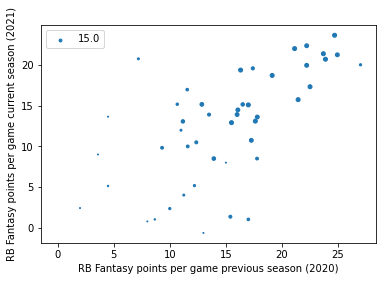

In [199]:
plt.scatter(ff_qb_pts['fp_per_gm20'], ff_qb_pts['fp_per_gm21'], s = ff_qb_pts['GS_20'])
plt.legend(ff_qb_pts['GS_20']) ## Need to figure out how to add a good legend in
plt.xlabel('RB Fantasy points per game previous season (2020)')
plt.ylabel('RB Fantasy points per game current season (2021)')

Text(0, 0.5, 'QB Fantasy points per game current season (2021)')

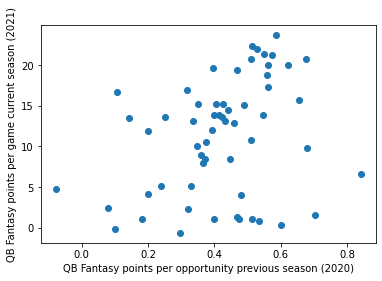

In [200]:
plt.scatter(ff_qb_pts['fp_per_opp20'], ff_qb_pts['fp_per_gm21'])
plt.xlabel('QB Fantasy points per opportunity previous season (2020)')
plt.ylabel('QB Fantasy points per game current season (2021)')

Text(0, 0.5, 'QB Fantasy points in previous season (2020)')

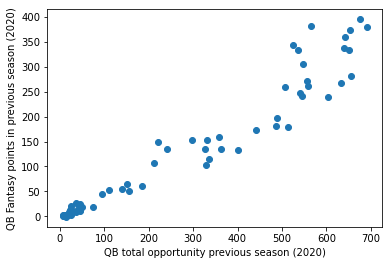

In [259]:
plt.scatter(ff_qb_pts['ttl_opp20'], ff_qb_pts['FantasyPoints_20'])
plt.xlabel('QB total opportunity previous season (2020)')
plt.ylabel('QB Fantasy points in previous season (2020)')

<AxesSubplot:>

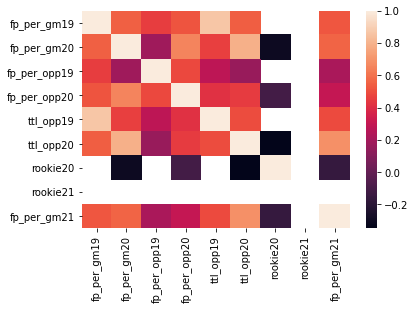

In [260]:
sns.heatmap(ff_qb_pts[['fp_per_gm19','fp_per_gm20', 'fp_per_opp19', 'fp_per_opp20', 'ttl_opp19', 'ttl_opp20', 'rookie20',
                       'rookie21',
                       'fp_per_gm21']].corr())

### RB

In [256]:
ff_rb_pts['rookie21'].describe()

count    135.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: rookie21, dtype: float64

Text(0, 0.5, 'RB Fantasy points per game current season (2021)')

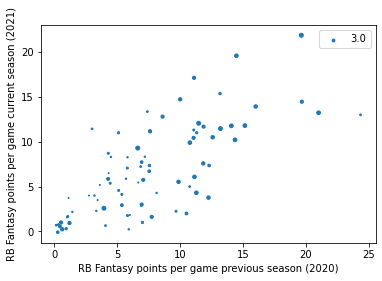

In [198]:
plt.scatter(ff_rb_pts['fp_per_gm20'], ff_rb_pts['fp_per_gm21'], s = ff_rb_pts['GS_20'])
plt.legend(ff_rb_pts['GS_20']) ## Need to figure out how to add a good legend in
plt.xlabel('RB Fantasy points per game previous season (2020)')
plt.ylabel('RB Fantasy points per game current season (2021)')

The players with possibly most value are the ones lower on the x axis, but higher on y axis

Text(0, 0.5, 'RB Fantasy points per game current season (2021)')

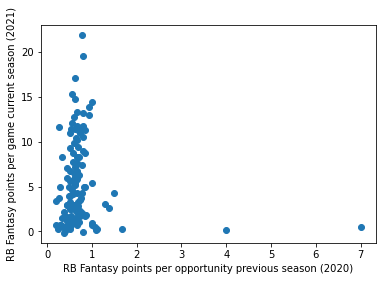

In [176]:
plt.scatter(ff_rb_pts['fp_per_opp20'], ff_rb_pts['fp_per_gm21'])
plt.xlabel('RB Fantasy points per opportunity previous season (2020)')
plt.ylabel('RB Fantasy points per game current season (2021)')

There appear to be some outliers in fantasy points per opportunity

Text(0, 0.5, 'RB Fantasy points in previous season (2020)')

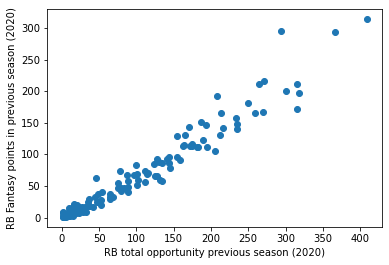

In [187]:
plt.scatter(ff_rb_pts['ttl_opp20'], ff_rb_pts['FantasyPoints_20'])
plt.xlabel('RB total opportunity previous season (2020)')
plt.ylabel('RB Fantasy points in previous season (2020)')

<AxesSubplot:>

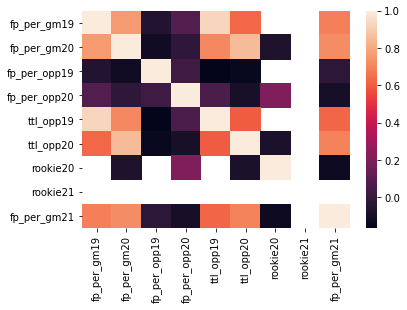

In [245]:
sns.heatmap(ff_rb_pts[['fp_per_gm19','fp_per_gm20', 'fp_per_opp19', 'fp_per_opp20', 'ttl_opp19', 'ttl_opp20', 'rookie20',
                       'rookie21',
                       'fp_per_gm21']].corr())

### WR

Text(0, 0.5, 'WR Fantasy points per game current season (2021)')

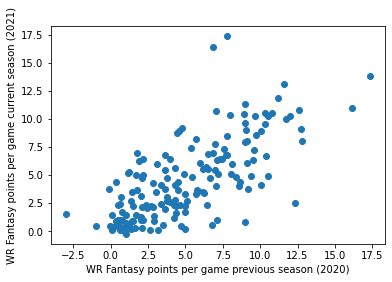

In [178]:
plt.scatter(ff_wr_pts['fp_per_gm20'], ff_wr_pts['fp_per_gm21'])
plt.xlabel('WR Fantasy points per game previous season (2020)')
plt.ylabel('WR Fantasy points per game current season (2021)')

Text(0, 0.5, 'WR Fantasy points per game current season (2021)')

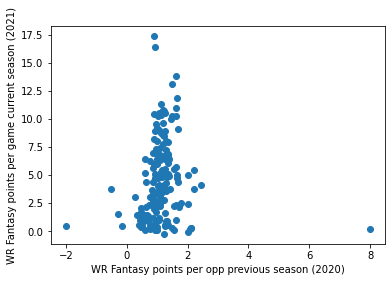

In [181]:
plt.scatter(ff_wr_pts['fp_per_opp20'], ff_wr_pts['fp_per_gm21'])
plt.xlabel('WR Fantasy points per opp previous season (2020)')
plt.ylabel('WR Fantasy points per game current season (2021)')

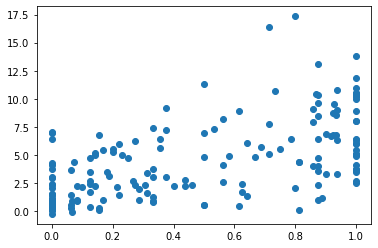

In [184]:
plt.scatter(ff_wr_pts['pct_gs20'], ff_wr_pts['fp_per_gm21'])

Text(0, 0.5, 'WR Fantasy points in previous season (2020)')

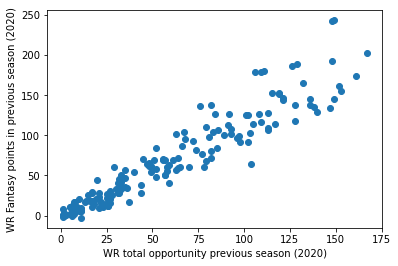

In [261]:
plt.scatter(ff_wr_pts['ttl_opp20'], ff_wr_pts['FantasyPoints_20'])
plt.xlabel('WR total opportunity previous season (2020)')
plt.ylabel('WR Fantasy points in previous season (2020)')

<AxesSubplot:>

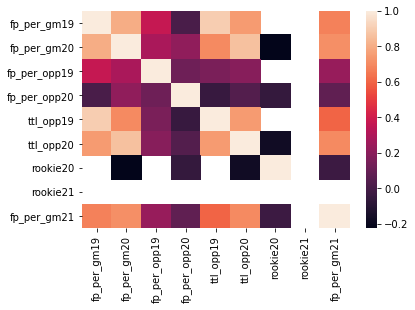

In [262]:
sns.heatmap(ff_wr_pts[['fp_per_gm19','fp_per_gm20', 'fp_per_opp19', 'fp_per_opp20', 'ttl_opp19', 'ttl_opp20', 'rookie20',
                       'rookie21',
                       'fp_per_gm21']].corr())

### TE

Text(0, 0.5, 'TE Fantasy points per game current season (2021)')

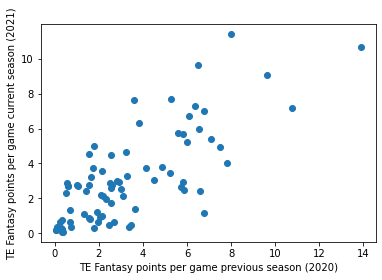

In [263]:
plt.scatter(ff_te_pts['fp_per_gm20'], ff_te_pts['fp_per_gm21'])
plt.xlabel('TE Fantasy points per game previous season (2020)')
plt.ylabel('TE Fantasy points per game current season (2021)')

Text(0, 0.5, 'TE Fantasy points per game current season (2021)')

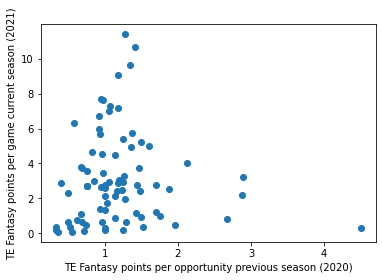

In [264]:
plt.scatter(ff_te_pts['fp_per_opp20'], ff_te_pts['fp_per_gm21'])
plt.xlabel('TE Fantasy points per opportunity previous season (2020)')
plt.ylabel('TE Fantasy points per game current season (2021)')

Text(0, 0.5, 'TE Fantasy points previous season (2020)')

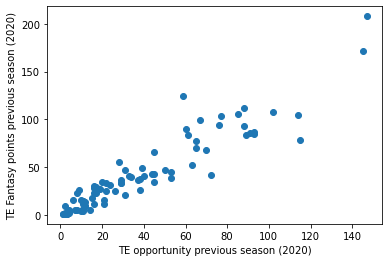

In [266]:
plt.scatter(ff_te_pts['ttl_opp20'], ff_te_pts['FantasyPoints_20'])
plt.xlabel('TE opportunity previous season (2020)')
plt.ylabel('TE Fantasy points previous season (2020)')

Text(0, 0.5, 'TE Fantasy points previous season (2020)')

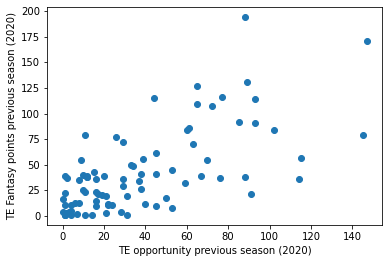

In [267]:
plt.scatter(ff_te_pts['ttl_opp20'], ff_te_pts['FantasyPoints_21'])
plt.xlabel('TE opportunity previous season (2020)')
plt.ylabel('TE Fantasy points previous season (2020)')

<AxesSubplot:>

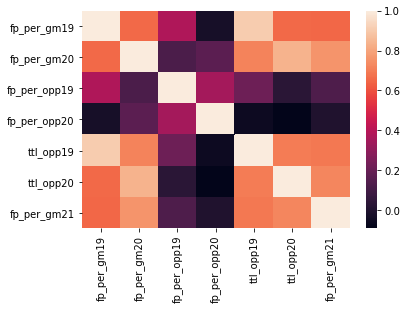

In [269]:
sns.heatmap(ff_te_pts[['fp_per_gm19','fp_per_gm20', 'fp_per_opp19', 'fp_per_opp20', 'ttl_opp19', 'ttl_opp20', 
                       'fp_per_gm21']].corr())

## Initial Modeling

### Idea for next notebook/dataframe to combine with this
Can we add more to these data frames, in terms of -- year in the league in '21, rookie contract or not, previous year team passing ranks, rushing ranks, qb play, OL play, etc.

# need a dataset of predictor variables for final 

from bs4 import BeautifulSoup
from urllib import request


# 2022 data or testing data

r = request.get("https://www.pro-football-reference.com/years/2022/fantasy.htm").read()
soup = BeautifulSoup(website, 'lxml')

table = soup.find('table', attrs={'id': 'fantasy','class': 'per_match_toggle'})

table_headers = [header.text for header in table.find('thead').find_all('th')]
table_rows = table.find_all('tr')

player_data = [[td.getText() for tr in table_rows[i].findAll(['td','th'])] for i in table_rows]

print(table_headers)
df = pd.DataFrame(player_data,table_headers)

df.head()